<a href="https://colab.research.google.com/github/HARSH1907HS/AI-DS/blob/main/Housepriceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

np.random.seed(42)

size = np.random.randint(500,5000,1000)
bedrooms = np.random.randint(1,6,1000)
location = np.random.randint(1,51,1000)
age = np.random.randint(1,51,1000)

price = (size*300)+(bedrooms*50000)+(location*20000)-(age*2000)+np.random.randint(-20000,20000,1000)

df = pd.DataFrame({"Size":size,"Bedrooms":bedrooms,"Location":location,"Age":age,"Price":price})

csv_filename = "House_Prices_Data.csv"
df.to_csv(csv_filename,index=False)

print(f"Data saved to {csv_filename}")

Data saved to House_Prices_Data.csv


In [ ]:
import pandas as pd

df = pd.read_csv("House_Prices_Data.csv")

print(df.head())

   Size  Bedrooms  Location  Age    Price
0  1360         2        12   14   701855
1  4272         3        32   18  2029394
2  3592         1        32    9  1765131
3   966         1        28   39   806786
4  4926         2        13   28  1794098


In [ ]:
#check for missing values
print(df.isnull().sum())

#summary statistic
print(df.describe())

Size        0
Bedrooms    0
Location    0
Age         0
Price       0
dtype: int64
              Size     Bedrooms     Location          Age         Price
count  1000.000000  1000.000000  1000.000000  1000.000000  1.000000e+03
mean   2815.422000     2.990000    25.707000    25.966000  1.456523e+06
std    1255.514921     1.427564    14.209259    14.374821  4.726815e+05
min     503.000000     1.000000     1.000000     1.000000  2.317830e+05
25%    1749.500000     2.000000    14.000000    13.000000  1.125041e+06
50%    2862.500000     3.000000    25.000000    26.000000  1.475426e+06
75%    3849.500000     4.000000    38.000000    38.000000  1.775946e+06
max    4999.000000     5.000000    50.000000    50.000000  2.636989e+06


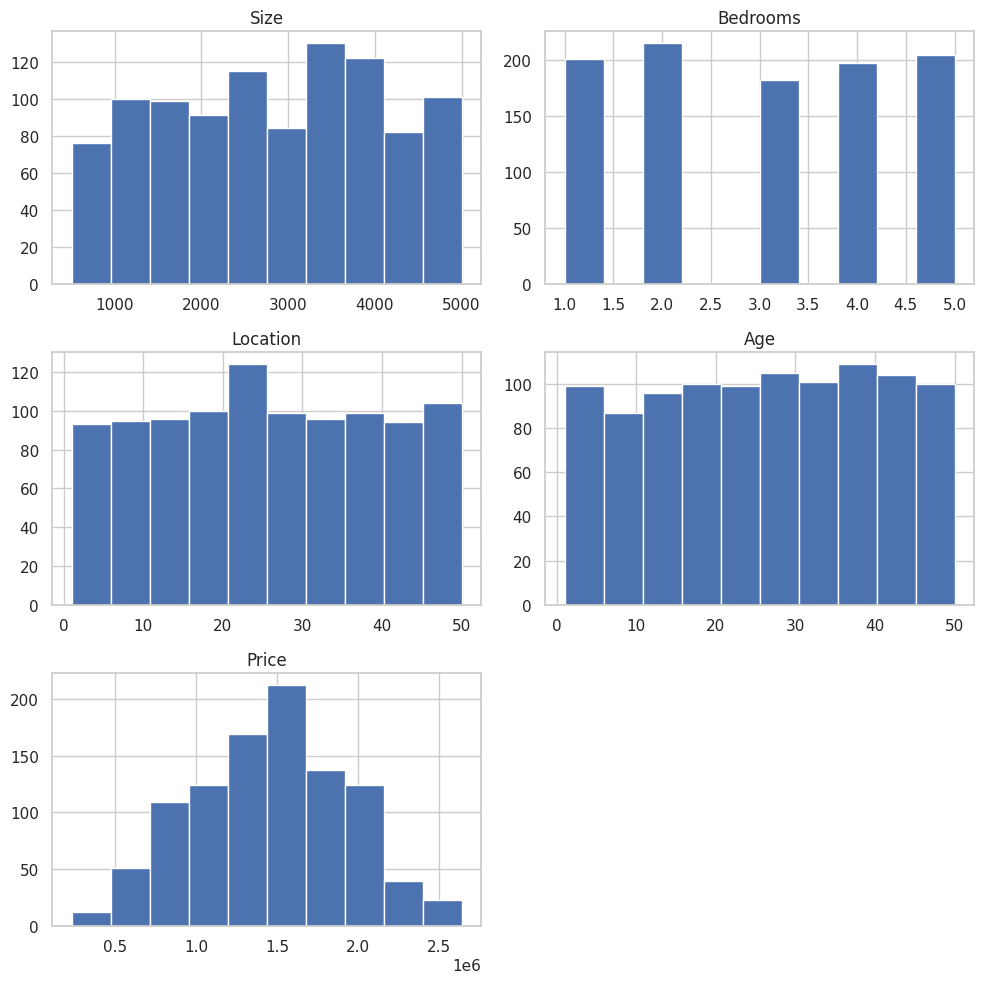

In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns



sns.set(style="whitegrid")



df.hist(figsize=(10,10))

plt.tight_layout()

plt.show()

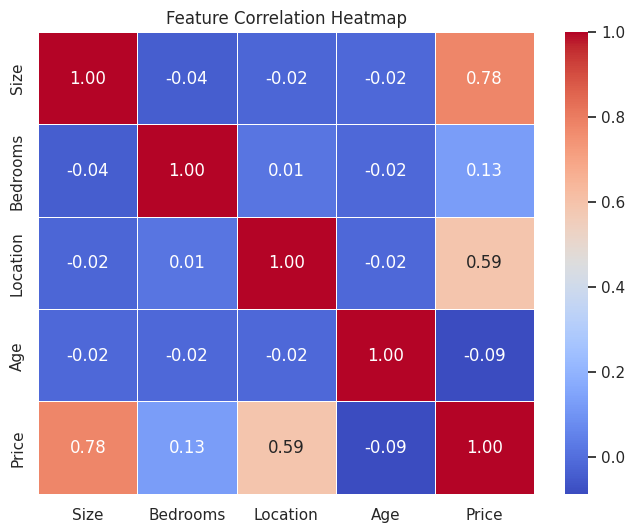

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 'Bedrooms' is the correct column name, not 'Bedroom'
X = df.drop(["Size", "Bedrooms", "Location", "Age"], axis=1)
y = df["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nModel Performance:\nMAE: {mae:.2f}, R^2 score: {r2:.2f}")


Model Performance:
MAE: 0.00, R^2 score: 1.00


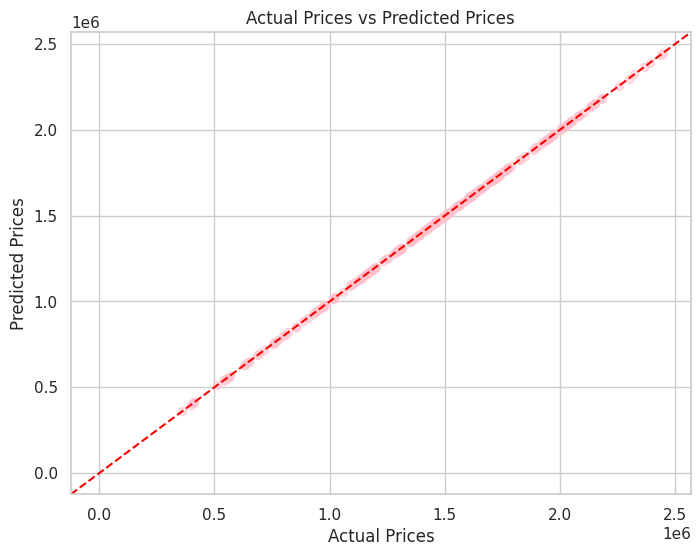

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='pink')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.axline([0,0], slope=1, color='red', linestyle='--')
plt.show()